#IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#IMPORTING DATASET

In [ ]:
app_train = pd.read_csv("/content/application_train.csv")

#EXPLORING DATA

In [ ]:
#Info Kolom
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287286 entries, 0 to 287285
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(85), int64(21), object(16)
memory usage: 267.4+ MB


In [ ]:
app_train.shape

(287286, 122)

Pengamatan:
1. Data terdiri dari 420822 Baris dan 75 Kolom
2. Tampak beberapa kolom masih memiliki null/missing values (Non-Null Count < jumlah baris)

In [ ]:
app_train = app_train.drop(['SK_ID_CURR','NAME_TYPE_SUITE','OWN_CAR_AGE','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','EXT_SOURCE_1','YEARS_BUILD_AVG',
                            'COMMONAREA_AVG','FLOORSMIN_AVG','LIVINGAPARTMENTS_AVG','NONLIVINGAPARTMENTS_MODE','FONDKAPREMONT_MODE','YEARS_BUILD_MEDI','NONLIVINGAPARTMENTS_AVG',
                            'YEARS_BUILD_MODE','COMMONAREA_MODE','FLOORSMIN_MODE','NONLIVINGAPARTMENTS_MEDI','LIVINGAPARTMENTS_MODE','COMMONAREA_MEDI','FLOORSMIN_MEDI',
                            'LIVINGAPARTMENTS_MEDI'], axis=1)

#LOADING DATASET

In [ ]:
#Melihat semua Kolom dan baris
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
app_train.sample(5)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
36528,0,Cash loans,F,N,N,1,225000.0,497520.0,33246.0,450000.0,Working,Higher education,Married,House / apartment,0.006233,-11580,-264,-8213.0,-3268,1,1,1,1,0,0,Laborers,3.0,2,2,0,0,0,0,1,1,Services,0.606816,0.280790,0.1680,0.1489,0.9891,0.12,0.1034,0.3750,0.0843,0.1977,0.0000,0.1712,0.1545,0.9891,0.1208,0.1034,0.3750,0.0862,0.2060,0.0000,0.1697,0.1489,0.9891,0.12,0.1034,0.3750,0.0858,0.2013,0.0000,block of flats,0.1817,Panel,No,0.0,0.0,0.0,0.0,-1175.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
210866,0,Cash loans,M,N,Y,0,135000.0,254700.0,25321.5,225000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,0.007274,-24564,365243,-11666.0,-4223,1,0,0,1,0,0,NaN,1.0,2,2,0,0,0,0,0,0,XNA,0.144761,0.759712,0.1485,NaN,0.9841,0.16,0.1379,0.3333,NaN,NaN,0.0286,0.1513,NaN,0.9841,0.1611,0.1379,0.3333,NaN,NaN,0.0303,0.1499,NaN,0.9841,0.16,0.1379,0.3333,NaN,NaN,0.0292,block of flats,0.1259,Panel,No,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177250,0,Cash loans,F,N,N,1,135000.0,1408113.0,41301.0,1102500.0,Working,Secondary / secondary special,Married,Municipal apartment,0.020713,-14347,-4492,-8420.0,-4351,1,1,0,1,0,0,Laborers,3.0,3,2,0,0,0,0,0,0,Postal,0.640590,0.783832,0.1021,0.0877,0.9796,0.00,0.2069,0.1667,0.0283,0.0919,0.0000,0.1040,0.0910,0.9796,0.0000,0.2069,0.1667,0.0290,0.0958,0.0000,0.1031,0.0877,0.9796,0.00,0.2069,0.1667,0.0288,0.0936,0.0000,block of flats,0.0785,Panel,No,3.0,0.0,3.0,0.0,-150.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
189933,0,Cash loans,F,N,N,1,166500.0,314055.0,14683.5,238500.0,Working,Higher education,Married,House / apartment,0.020713,-12825,-150,-2611.0,-2885,1,1,0,1,0,0,Core staff,3.0,3,3,0,0,0,0,1,1,Kindergarten,0.395632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0,4.0,1.0,-2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
281992,0,Cash loans,M,Y,Y,2,157500.0,990432.0,32863.5,855000.

#DEFINE TARGET VARIABLE

Dalam project credit risk modeling, tujuan utama adalah untuk melakukan prediksi terhadap suatu individu akan kemampuan mereka untuk melakukan pembayaran terhadap pinjaman/kredit yang diberikan. Oleh karena itu, variabel target yang digunakan harus mencerminkan kemampuan individu dalam hal tersebut.

Dalam dataset ini, variabel TARGET adalah variabel yang dapat dijadikan variabel target karena mencerminkan performa masing-masing individu dalam melakukan pembayaran terhadap pinjaman/kredit selama ini.

In [ ]:
app_train.TARGET.value_counts(normalize=True)*100

0    91.916418
1     8.083582
Name: TARGET, dtype: float64

Dapat dilihat bahwa variabel TARGET memiliki 2 nilai:

1 artinya klien dengan kesulitan pembayaran: Dia memiliki pembayaran terlambat lebih dari x hari pada setidaknya satu dari angsuran y pertama dari pinjaman, 0 - semua kasus lainnya

Dari definisi-definisi tersebut, masing-masing individu dapat ditandai apakah mereka merupakan bad loan (peminjam yang buruk) atau good loan (peminjam yang baik)

#EXPLORATORY DATA ANALYSIS

##Correlation Check

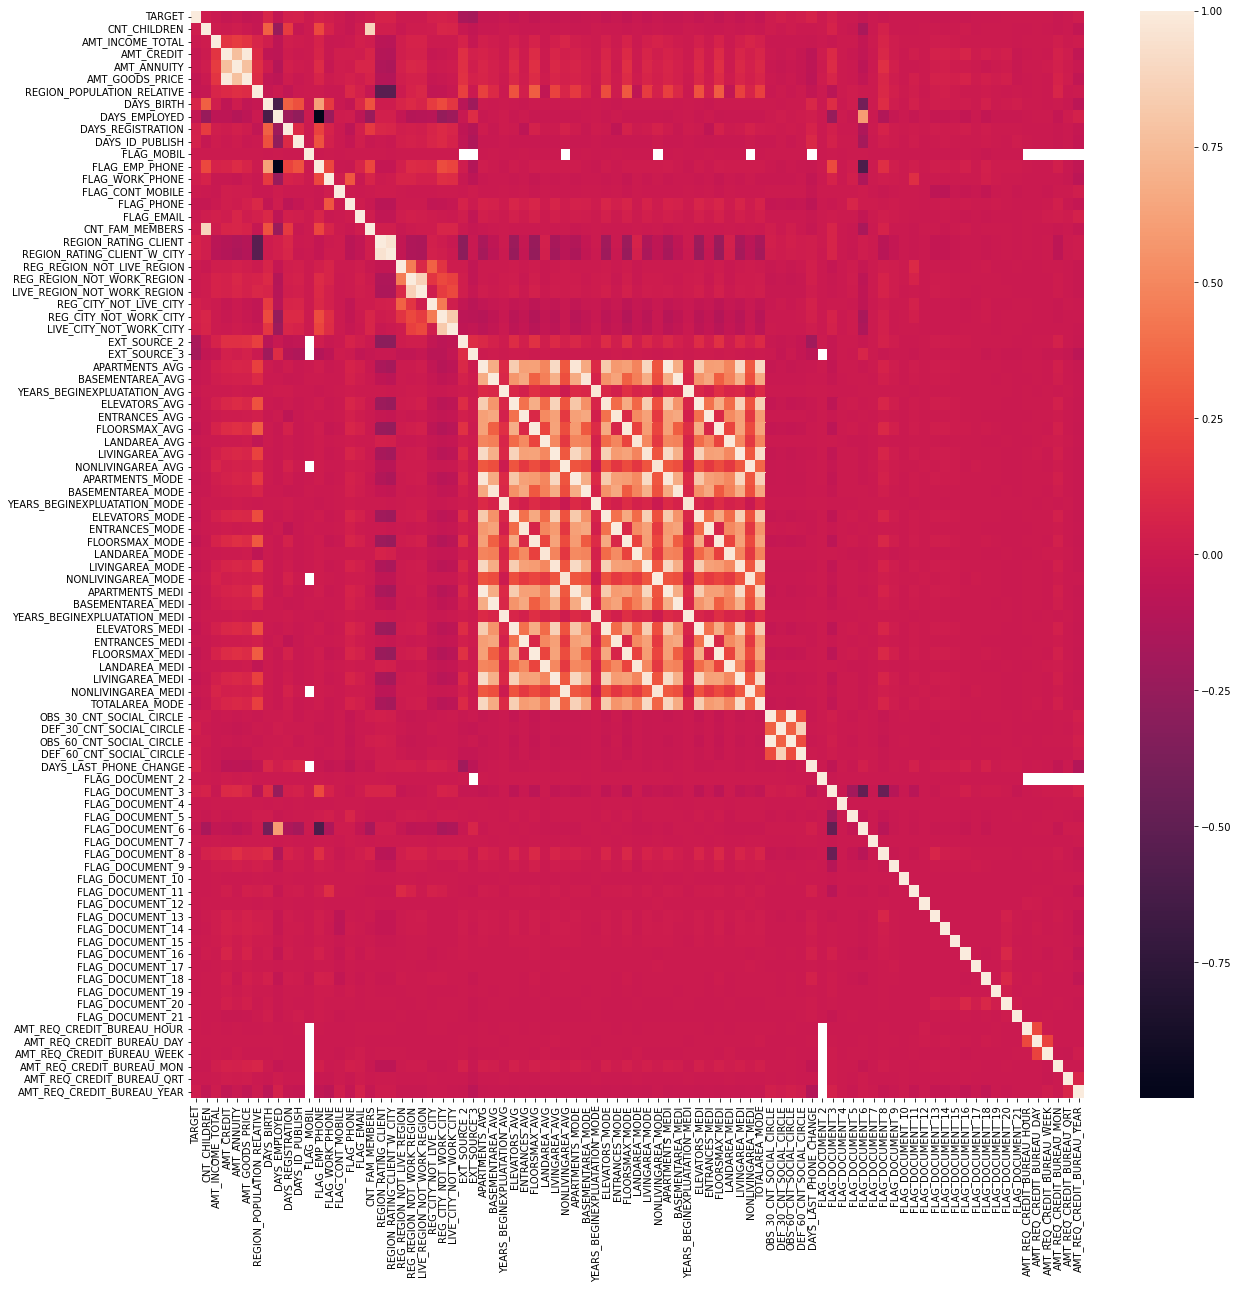

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(app_train.corr())

Di sini, jika ada pasangan fitur-fitur yang memiliki korelasi tinggi maka akan diambil salah satu saja. Nilai korelasi yang dijadikan patokan sebagai korelasi tinggi tidak pasti, umumnya digunakan angka 0.7.

In [ ]:
corr_matrix = app_train.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [ ]:
to_drop_hicorr

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'FLAG_EMP_PHONE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT_W_CITY',
 'LIVE_REGION_NOT_WORK_REGION',
 'LIVE_CITY_NOT_WORK_CITY',
 'ELEVATORS_AVG',
 'LIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'LANDAREA_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE']

In [ ]:
app_train.drop(to_drop_hicorr, axis=1, inplace=True)

##Check Categorical Features

In [ ]:
app_train.select_dtypes(include='object').nunique()

NAME_CONTRACT_TYPE      2
CODE_GENDER             3
FLAG_OWN_CAR            2
FLAG_OWN_REALTY         2
NAME_INCOME_TYPE        8
NAME_EDUCATION_TYPE     5
NAME_FAMILY_STATUS      6
NAME_HOUSING_TYPE       6
OCCUPATION_TYPE        18
ORGANIZATION_TYPE      58
HOUSETYPE_MODE          3
WALLSMATERIAL_MODE      7
EMERGENCYSTATE_MODE     2
dtype: int64

Pada tahap ini dilakukan pembuangan fitur yang memiliki nilai unik yang sangat tinggi (high cardinality) dan fitur yang hanya memiliki satu nilai unik saja.

In [ ]:
app_train.drop(['OCCUPATION_TYPE', 'ORGANIZATION_TYPE'], axis=1, inplace=True)

In [ ]:
app_train.select_dtypes(exclude='object').nunique()

TARGET                              2
CNT_CHILDREN                       15
AMT_INCOME_TOTAL                 2417
AMT_CREDIT                       5511
REGION_POPULATION_RELATIVE         81
DAYS_BIRTH                      17446
DAYS_EMPLOYED                   12435
DAYS_REGISTRATION               15614
DAYS_ID_PUBLISH                  6156
FLAG_MOBIL                          2
FLAG_WORK_PHONE                     2
FLAG_CONT_MOBILE                    2
FLAG_PHONE                          2
FLAG_EMAIL                          2
REGION_RATING_CLIENT                3
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
EXT_SOURCE_2                   116516
EXT_SOURCE_3                      813
APARTMENTS_AVG                   2301
BASEMENTAREA_AVG                 3753
YEARS_BEGINEXPLUATATION_AVG       284
ENTRANCES_AVG                     277
FLOORSMAX_AVG                     396
LANDAREA_AVG

Ternyata, pada tipe data selain object juga terdapat fitur yang hanya memiliki satu nilai unik saja, maka akan ikut dibuang juga.

In [ ]:
app_train.drop(['FLAG_DOCUMENT_12'], axis=1, inplace=True)

In [ ]:
for col in app_train.select_dtypes(include='object').columns.tolist():
    print(app_train[col].value_counts(normalize=True)*100)
    print('\n')

Cash loans         90.493794
Revolving loans     9.506206
Name: NAME_CONTRACT_TYPE, dtype: float64


F      65.858761
M      34.139847
XNA     0.001392
Name: CODE_GENDER, dtype: float64


N    66.004957
Y    33.995043
Name: FLAG_OWN_CAR, dtype: float64


Y    69.366763
N    30.633237
Name: FLAG_OWN_REALTY, dtype: float64


Working                 51.634260
Commercial associate    23.308132
Pensioner               17.981384
State servant            7.059168
Unemployed               0.007310
Student                  0.005569
Businessman              0.003133
Maternity leave          0.001044
Name: NAME_INCOME_TYPE, dtype: float64


Secondary / secondary special    71.020516
Higher education                 24.355520
Incomplete higher                 3.331871
Lower secondary                   1.239183
Academic degree                   0.052909
Name: NAME_EDUCATION_TYPE, dtype: float64


Married                 63.908440
Single / not married    14.783178
Civil marriage           9.673983
S

Fitur yang sangat didominasi oleh salah satu nilai saja akan dibuang pada tahap ini.

In [ ]:
app_train.drop('EMERGENCYSTATE_MODE', axis=1, inplace=True)

#MISSING VALUES

##Missing Value Checking

In [ ]:
check_missing = app_train.isnull().sum() * 100 / app_train.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

LANDAREA_AVG                   59.406654
BASEMENTAREA_AVG               58.550364
NONLIVINGAREA_AVG              55.202829
WALLSMATERIAL_MODE             50.865340
APARTMENTS_AVG                 50.776926
ENTRANCES_AVG                  50.373495
HOUSETYPE_MODE                 50.204674
FLOORSMAX_AVG                  49.779662
YEARS_BEGINEXPLUATATION_AVG    48.796670
EXT_SOURCE_3                   19.838419
AMT_REQ_CREDIT_BUREAU_MON      13.510578
AMT_REQ_CREDIT_BUREAU_DAY      13.510578
AMT_REQ_CREDIT_BUREAU_WEEK     13.510578
AMT_REQ_CREDIT_BUREAU_YEAR     13.510578
AMT_REQ_CREDIT_BUREAU_QRT      13.510578
AMT_REQ_CREDIT_BUREAU_HOUR     13.510578
DEF_30_CNT_SOCIAL_CIRCLE        0.331377
OBS_30_CNT_SOCIAL_CIRCLE        0.331377
EXT_SOURCE_2                    0.215465
DAYS_LAST_PHONE_CHANGE          0.000696
FLAG_DOCUMENT_7                 0.000348
FLAG_DOCUMENT_18                0.000348
FLAG_DOCUMENT_2                 0.000348
FLAG_DOCUMENT_3                 0.000348
FLAG_DOCUMENT_4 

In [ ]:
#Mengecek Missing Data
app_train.isnull().sum()

TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
FLAG_MOBIL                          0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE                          0
FLAG_EMAIL                          0
REGION_RATING_CLIENT                0
REG_REGION_NOT_LIVE_REGION          0
REG_REGION_NOT_WORK_REGION          0
REG_CITY_NOT_LIVE_CITY              0
REG_CITY_NOT

###Missing Values Filling

In [ ]:
app_train['LANDAREA_AVG'].fillna(0, inplace=True)
app_train['BASEMENTAREA_AVG'].fillna(0, inplace=True)
app_train['NONLIVINGAREA_AVG'].fillna(0, inplace=True)
app_train['WALLSMATERIAL_MODE'].fillna(0, inplace=True)
app_train['APARTMENTS_AVG'].fillna(0, inplace=True)
app_train['ENTRANCES_AVG'].fillna(0, inplace=True)
app_train['HOUSETYPE_MODE'].fillna(0, inplace=True)
app_train['FLOORSMAX_AVG'].fillna(0, inplace=True)
app_train['YEARS_BEGINEXPLUATATION_AVG'].fillna(0, inplace=True)
app_train['EXT_SOURCE_3'].fillna(0, inplace=True)
app_train['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(0, inplace=True)
app_train['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(0, inplace=True)
app_train['AMT_REQ_CREDIT_BUREAU_MON'].fillna(0, inplace=True)
app_train['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(0, inplace=True)
app_train['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(0, inplace=True)
app_train['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(0, inplace=True)
app_train['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(0, inplace=True)
app_train['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(0, inplace=True)
app_train['EXT_SOURCE_2'].fillna(0, inplace=True)
app_train['DAYS_LAST_PHONE_CHANGE'].fillna(0, inplace=True)

In [ ]:
#Drop baris dengan Missing Values
app_train = app_train.dropna(axis=0, how='any')

In [ ]:
app_train.isnull().sum()

TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
REGION_RATING_CLIENT           0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
EXT_SOURCE_2                   0
EXT_SOURCE_3                   0
APARTMENTS_AVG                 0
BASEMENTAR

#FEATURE SCALING AND TRANSFORMATION

##Label Encoding

Semua kolom kategorikal dilakukan Label Encoding.

In [ ]:
categorical_cols = [col for col in app_train.select_dtypes(include='object').columns.tolist()]

In [ ]:
categorical_cols

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE']

In [ ]:
#Label encoding kolom 'NAME_CONTRACT_TYPE'
mapping_NAME_CONTRACT_TYPE = {
  'Cash loans' : 0,
  'Revolving loans' : 1,
}
app_train['NAME_CONTRACT_TYPE'] = app_train['NAME_CONTRACT_TYPE'].map(mapping_NAME_CONTRACT_TYPE)
    
#Label encoding kolom 'CODE_GENDER'
mapping_CODE_GENDER = {
  'M' : 0,
  'F' : 1,
  'XNA' : 2,
}
app_train['CODE_GENDER'] = app_train['CODE_GENDER'].map(mapping_CODE_GENDER)

#Label encoding kolom 'FLAG_OWN_CAR'
mapping_FLAG_OWN_CAR = {
    'N' : 0,
    'Y' : 1,
}
app_train['FLAG_OWN_CAR'] = app_train['FLAG_OWN_CAR'].map(mapping_FLAG_OWN_CAR)

#Label encoding kolom 'FLAG_OWN_REALTY'
mapping_FLAG_OWN_REALTY = {
    'Y' : 0, 
    'N' : 1,
}
app_train['FLAG_OWN_REALTY'] = app_train['FLAG_OWN_REALTY'].map(mapping_FLAG_OWN_REALTY)

#Label encoding kolom 'NAME_INCOME_TYPE'
mapping_NAME_INCOME_TYPE = {
    'Working' : 0, 
    'State servant' : 1, 
    'Commercial associate' : 2, 
    'Pensioner' : 3,
    'Unemployed' : 4,
    'Student' : 5, 
    'Businessman' : 6,
    'Maternity leave' : 7,
}
app_train['NAME_INCOME_TYPE'] = app_train['NAME_INCOME_TYPE'].map(mapping_NAME_INCOME_TYPE)

#Label encoding kolom 'NAME_EDUCATION_TYPE'
mapping_NAME_EDUCATION_TYPE = {
    'Secondary / secondary special' : 0, 
    'Higher education' : 1,
    'Incomplete higher' : 2, 
    'Lower secondary' : 3,
    'Academic degree' : 4,
}
app_train['NAME_EDUCATION_TYPE'] = app_train['NAME_EDUCATION_TYPE'].map(mapping_NAME_EDUCATION_TYPE)

#Label encoding kolom 'NAME_FAMILY_STATUS
mapping_NAME_FAMILY_STATUS = {
    'Single / not married' : 0, 
    'Married' : 1,
    'Civil marriage' : 2,
    'Widow' : 3,
    'Separated' : 4,
    'Unknown': 5,
}
app_train['NAME_FAMILY_STATUS'] = app_train['NAME_FAMILY_STATUS'].map(mapping_NAME_FAMILY_STATUS)

#Label encoding kolom 'NAME_HOUSING_TYPE'
mapping_NAME_HOUSING_TYPE = {
    'House / apartment' : 0, 
    'Rented apartment' : 1,
    'With parents' : 2,
    'Municipal apartment' : 3,
    'Office apartment' : 4,
    'Co-op apartment' : 5,
}
app_train['NAME_HOUSING_TYPE'] = app_train['NAME_HOUSING_TYPE'].map(mapping_NAME_HOUSING_TYPE)

#Label encoding kolom 'HOUSETYPE_MODE'
mapping_HOUSETYPE_MODE = {
    'block of flats' : 0, 
    'terraced house' : 1,
    'specific housing': 2,
    0 : 3,
}
app_train['HOUSETYPE_MODE'] = app_train['HOUSETYPE_MODE'].map(mapping_HOUSETYPE_MODE)

#Label encoding kolom 'WALLSMATERIAL_MODE'
mapping_WALLSMATERIAL_MODE = {
    'Stone, brick' : 0,
    'Block' : 1,
    'Panel' : 2,
    'Mixed' : 3,
    'Wooden' : 4,
    'Others' : 5,
    'Monolithic':6,
    0 : 7,
}
app_train['WALLSMATERIAL_MODE'] = app_train['WALLSMATERIAL_MODE'].map(mapping_WALLSMATERIAL_MODE)

In [ ]:
Encod = app_train[['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
                  'NAME_HOUSING_TYPE','HOUSETYPE_MODE','WALLSMATERIAL_MODE']]

In [ ]:
Encod.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,HOUSETYPE_MODE,WALLSMATERIAL_MODE
0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,1,1,1,0,0,1
2,1,0,1,0,0,0,0,0,3,7
3,0,1,0,0,0,0,2,0,3,7
4,0,0,0,0,0,0,0,0,3,7


##Standardization

Semua kolom numerikal dilakukan proses standarisasi dengan StandardScaler.

In [ ]:
numerical_cols = [col for col in app_train.columns.tolist() if col not in categorical_cols + ['TARGET']]

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
std = pd.DataFrame(ss.fit_transform(app_train[numerical_cols]), columns=numerical_cols)

In [ ]:
std.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,NONLIVINGAREA_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,-0.577226,0.138055,-0.478156,-0.149308,1.506053,-0.455853,0.380324,0.578785,0.001866,-0.499064,0.043396,1.598747,-0.245512,-0.102929,-0.124182,-0.231031,-0.291645,-0.547505,-1.301665,-1.007888,-0.344545,0.003313,0.961367,-0.051859,-0.198216,0.163589,-0.261532,0.242092,4.165119,-0.206768,-0.006463,0.638407,-0.00914,-0.123704,-0.310448,-0.014087,-0.297583,-0.062812,-0.004936,-0.06228,-0.002639,-0.059692,-0.05412,-0.034775,-0.100223,-0.01616,-0.090406,-0.024189,-0.022316,-0.018567,-0.070791,-0.058832,-0.155911,-0.270491,-0.30467,-0.346629
1,-0.577226,0.414891,1.724129,-1.252830,-0.167084,-0.459755,1.079018,1.790259,0.001866,-0.499064,0.043396,1.598747,-0.245512,-2.067587,-0.124182,-0.231031,-0.291645,-0.547505,0.566242,-1.527440,0.396908,0.236050,0.987664,-0.387181,1.168441,-0.227751,-0.059287,-0.173811,-0.320186,0.163295,-0.006463,0.638407,-0.00914,-0.123704,-0.310448,-0.014087,-0.297583,-0.062812,-0.004936,-0.06228,-0.002639,-0.059692,-0.05412,-0.034775,-0.100223,-0.01616,-0.090406,-0.024189,-0.022316,-0.018567,-0.070791,-0.058832,-0.155911,-0.270491,-0.30467,-0.885380
2,-0.577226,-0.415618,-1.152563,-0.783436,-0.689595,-0.452935,0.206643,0.306551,0.001866,2.003750,0.043396,1.598747,-0.245512,-0.102929,-0.124182,-0.231031,-0.291645,-0.547505,0.221387,1.192174,-0.601763,-0.533438,-1.020485,-0.722504,-0.744485,-0.440614,-0.261532,-0.589713,-0.320186,0.179016,-0.006463,-1.566400,-0.00914,-0.123704,-0.310448,-0.014087,-0.297583,-0.062812,-0.004936,-0.06228,-0.002639,-0.059692,-0.05412,-0.034775,-0.100223,-0.01616,-0.090406,-0.024189,-0.022316,-0.018567,-0.070791,-0.058832,-0.155911,-0.270491,-0.30467,-0.885380
3,-0.577226,-0.138781,-0.711357,-0.929005,-0.680203,-0.472863,-1.374927,0.368813,0.001866,-0.499064,0.043396,-0.625490,-0.245512,-0.102929,-0.124182,-0.231031,-0.291645,-0.547505,0.712826,-1.527440,-0.601763,-0.533438,-1.020485,-0.722504,-0.744485,-0.440614,-0.261532,0.242092,-0.320186,0.418469,-0.006463,0.638407,-0.00914,-0.123704,-0.310448,-0.014087,-0.297583,-0.062812,-0.004936,-0.06228,-0.002639,-0.059692,-0.05412,-0.034775,-0.100223,-0.01616,-0.090406,-0.024189,-0.022316,-0.018567,-0.070791,-0.058832,-0.155911,-0.270491,-0.30467,-0.885380
4,-0.577226,-0.194149,-0.213946,0.563860,-0.892552,-0.472856,0.192170,-0.307466,0.001866,-0.499064,0.043396,-0.625490,-0.245512,-0.102929,-0.124182,-0.231031,-0.291645,1.826468,-0.990832,-1.527440,-0.601763,-0.533438,-1.020485,-0.722504,-0.744485,-0.440614,-0.261532,-0.589713,-0.320186,-0.172906,-0.006463,-1.566400,-0.00914,-0.123704,-0.310448,-0.014087,3.360412,-0.062812,-0.004936,-0.06228,-0.002639,-0.059692,-0.05412,-0.034775,-0.100223,-0.01616,-0.090406,-0.024189,-0.022316,-0.018567,-0.070791,-0.058832,-0.155911,-0.270491,-0.30467,-0.885380


##Transformed Dataframe

Menggabungkan kembali kolom-kolom hasil transformasi

In [ ]:
data_model = pd.concat([Encod, std, app_train['TARGET']], axis=1)

In [ ]:
data_model.sample(5)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,NONLIVINGAREA_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
195324,0,1,0,0,0,1,3,0,0,0,-0.577226,-0.231060,-0.370382,0.563860,-0.512523,-0.533566,-0.927955,0.790743,0.001866,2.003750,0.043396,1.598747,-0.245512,-0.102929,-0.124182,-0.231031,-0.291645,-0.547505,-0.016279,0.594182,0.364626,0.419330,0.993779,-0.051859,1.441248,0.101368,-0.181047,1.489798,-0.320186,0.263671,-0.006463,0.638407,-0.00914,-0.123704,-0.310448,-0.014087,-0.297583,-0.062812,-0.004936,-0.06228,-0.002639,-0.059692,-0.05412,-0.034775,-0.100223,-0.01616,-0.090406,-0.024189,-0.022316,-0.018567,-0.070791,-0.058832,-0.155911,-0.270491,-0.304670,0.192123,0
52165,0,1,0,0,1,0,2,0,0,0,-0.577226,0.710183,2.462686,1.833490,-0.321707,-0.519354,0.264821,1.335873,0.001866,-0.499064,0.043396,-0.625490,-0.245512,-2.067587,-0.124182,-0.231031,-0.291645,-0.547505,0.558888,1.223684,0.245910,0.359691,0.965444,0.617815,0.348709,0.014585,-0.261532,-0.589713,-0.320186,-0.454686,-0.006463,0.638407,-0.00914,-0.123704,-0.310448,-0.014087,-0.297583,-0.062812,-0.004936,-0.06228,-0.002639,-0.059692,-0.05412,-0.034775,-0.100223,-0.01616,-0.090406,-0.024189,-0.022316,-0.018567,-0.070791,-0.058832,-0.155911,-0.270491,2.346184,-0.346629,0
186227,0,1,0,1,2,1,1,0,3,7,-0.577226,-0.046503,0.948553,0.139879,-0.478162,-0.528836,-1.338885,0.886124,0.001866,2.003750,0.043396,1.598747,-0.245512,-0.102929,-0.124182,-0.231031,-0.291645,-0.547505,0.793078,0.881891,-0.601763,-0.533438,-1.020485,-0.722504,-0.744485,-0.440614,-0.261532,-0.589713,-0.320186,-1.921634,-0.006463,0.638407,-0.00914,-0.123704,-0.310448,-0.014087,-0.297583,-0.062812,-0.004936,-0.06228,-0.002639,-0.059692,-0.05412,-0.034775,-0.100223,-0.01616,-0.090406,-0.024189,-0.022316,-0.018567,-0.070791,-0.058832,-0.155911,-0.270491,-0.304670,-0.346629,0
10545,0,1,1,0,0,0,0,0,3,7,-0.577226,-0.231060,-0.567447,-0.205135,1.757802,-0.463451,0.500651,1.297456,0.001866,-0.499064,0.043396,-0.625490,-0.245512,1.861728,-0.124182,-0.231031,-0.291645,-0.547505,-1.501364,-1.527440,-0.601763,-0.533438,-1.020485,-0.722504,-0.744485,-0.440614,-0.261532,-0.589713,-0.320186,0.648246,-0.006463,0.638407,-0.00914,-0.123704,-0.310448,-0.014087,-0.297583,-0.062812,-0.004936,-0.06228,-0.002639,-0.059692,-0.05412,-0.034775,-0.100223,-0.01616,-0.090406,-0.024189,-0.022316,-0.018567,-0.070791,-0.058832,-0.155911,0.901028,-0.304670,-0.346629,1
45695,0,1,0,1,0,0,0,0,0,1,-0.577226,0.322612,1.237870,-1.232799,-0.532223,-0.522562,-1.561094,0.733117,0.001866,-0.499064,0.043396,-0.625490,-0.245512,-0.102929,-0.124182,-0.231031,-0.291645,-0.547505,0.673682,0.547879,-0.472634,-0.533438,0.964425,-0.051859,-0.471023,-0.178629,-0.048969,-0.173811,-0.320186,-1.070248,-0.006463,0.638407,-0.00914,-0.123704,-0.310448,-0.014087,-0.297583,-0.062812,-0.004936,-0.06228,-0.002639,-0.059692,-0.05412,-0.034775,-0.100223,-0.01616,-0.090406,-0.024189,-0.022316,-0.018567,-0

#MODELING

##Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data_model.drop('TARGET', axis=1)
y = data_model['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((229828, 66), (57457, 66))

##Training

###Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(max_depth=4)
RandF =rfc.fit(X_train, y_train)

In [ ]:
#Memprediksi
y_pred_train_RandF = RandF.predict(X_train)
y_pred_test_RandF = RandF.predict(X_test)

In [ ]:
#Menghitung Akurasi Model
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
training_acc_RandF = accuracy_score(y_train, y_pred_train_RandF)
testing_acc_RandF = accuracy_score(y_test, y_pred_test_RandF)

print("Training Accuracy: {}".format(training_acc_RandF))
print("Testing Accuracy: {}".format(testing_acc_RandF))

print("Precision: {}".format(precision_score(y_test, y_pred_test_RandF)))
print("Recall: {}".format(recall_score(y_test, y_pred_test_RandF)))
print("F1-Score: {}".format(f1_score(y_test, y_pred_test_RandF)))

Training Accuracy: 0.9189219764345511
Testing Accuracy: 0.9201315766573264
Precision: 0.0
Recall: 0.0
F1-Score: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
#Memprediksi
y_pred_train_logreg = logreg.predict(X_train)
y_pred_test_logreg = logreg.predict(X_test)

In [ ]:
#Menghitung Akurasi Model
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
training_acc_logreg = accuracy_score(y_train, y_pred_train_logreg)
testing_acc_logreg = accuracy_score(y_test, y_pred_test_logreg)

print("Training Accuracy: {}".format(training_acc_logreg))
print("Testing Accuracy: {}".format(testing_acc_logreg))

print("Precision: {}".format(precision_score(y_test, y_pred_test_logreg)))
print("Recall: {}".format(recall_score(y_test, y_pred_test_logreg)))
print("F1-Score: {}".format(f1_score(y_test, y_pred_test_logreg)))

Training Accuracy: 0.9188828167151087
Testing Accuracy: 0.9201837896165829
Precision: 0.6
Recall: 0.0019612115929396384
F1-Score: 0.003909643788010426


###Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [ ]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
#Prediksi
y_pred_train = dtc.predict(X_train)
y_pred_test = dtc.predict(X_test)

In [ ]:
#Menghitung Akurasi Model
training_acc_DT = accuracy_score(y_train, y_pred_train)
testing_acc_DT = accuracy_score(y_test, y_pred_test)

print("Training Accuracy: {}".format(training_acc_DT))
print("Testing Accuracy: {}".format(testing_acc_DT))

print("Precision: {}".format(precision_score(y_test, y_pred_test)))
print("Recall: {}".format(recall_score(y_test, y_pred_test)))
print("F1-Score: {}".format(f1_score(y_test, y_pred_test)))

Training Accuracy: 1.0
Testing Accuracy: 0.851332300677028
Precision: 0.13660599374885088
Recall: 0.16190891261712792
F1-Score: 0.1481850817710411
